# simple simulated blend

In [1]:
#Import libraries
import astropy.io.fits as pf
import numpy as np
import matplotlib.pyplot as plt
from MuSCADeT import MCA
from MuSCADeT  import colour_subtraction as cs

At this point, the data are loaded. 

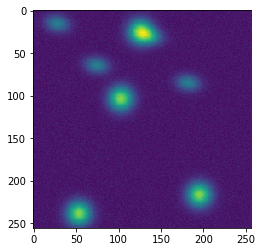

In [3]:
## Openning data cube
cube = pf.open('./Simu_simple/Cube.fits')[0].data
nb,n1,n2 = np.shape(cube)

Setting up the parameters for MuSCADeT and running.

In [ ]:
## Input parameters
pca = 'PCA'     #Estimation of the mixing coefficients from PCA. If different from PCA it will use the array provided in Aprior
n = 100        #Number of iterations
nsig = 5        #Threshold in units of noise standard deviation
ns = 2          #Number of sources
angle = 10      #Resolution angle for the PCA colour estimation (start with 15 then adjust empirically)

## Running MuSCADeT
S,A = MCA.mMCA(cube, 0, nsig,n, PCA=[ns,angle], mode=pca, lvl = 6)


Display of the results. The first plot shows the model and a comparison with the original image. The model is simply `AS` with `A` and `S` as estimated by MuSCADeT.

In [ ]:
# Models as extracted by MuSCADeT for display
model = np.dot(A,S.reshape([A.shape[1], n1*n2])).reshape(cube.shape)

normodel = cs.asinh_norm(model, Q=100)
normcube = cs.asinh_norm(cube, Q = 100)
normres = cs.asinh_norm(cube-model, Q = 10)
plt.figure(figsize = (15, 5))
plt.subplot(131)
plt.title('model')
plt.imshow(normodel)
plt.subplot(132)
plt.title('data')
plt.imshow(normcube)
plt.subplot(133)
plt.title('Residuals')
plt.imshow(normres)
plt.show()


This sequence of plots shows each component, with what the data looks like once the components are removed, i.e. `Y-AiSi`.

In [ ]:
for i in range(A.shape[1]):
    C = A[:,i, np.newaxis, np.newaxis]*S[np.newaxis,i,:,:]
    normC = cs.asinh_norm(C, Q = 100)
    normCres = cs.asinh_norm(cube-C, Q = 50)
    plt.figure(figsize = (15, 5))
    plt.subplot(131)
    plt.title('data')
    plt.imshow(normcube)
    plt.subplot(132)
    plt.title('component ' + str(i))
    plt.imshow(normC)
    plt.subplot(133)
    plt.title('data - component ' + str(i))
    plt.imshow(normCres)
    plt.show()